In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import igraph as ig
from collections import Counter
from efficient_apriori import apriori
import math

from src import acgraph as acg
from src import utils as ut
from src import xsmining as xsm

In [2]:
def get_degdistrib(g, isbottom = True):

    vidx_to_deg = dict()
    for v in g.vs:
        if v['type'] == isbottom:
            vidx_to_deg[v.index] = v.degree()
    
    degrees = list(vidx_to_deg.values())
    degree_counter = Counter(degrees)
    degree_keys = list(degree_counter.keys())
    counts = list(degree_counter.values())

    #sorting list based on another list
    #https://stackoverflow.com/questions/6618515/sorting-list-based-on-values-from-another-list
    temp = {degkey:count for degkey,count in sorted(zip(degree_keys, counts))}
    deg_ks = list(temp.keys())
    deg_distr = list(temp.values())
    
    return vidx_to_deg, dict(zip(deg_ks,deg_distr))

### Load access control graph

In [5]:
usrlabels, usrlabel_to_attvals, usrname_to_usrlabel, \
reslabels, reslabel_to_attvals, resname_to_reslabel, usrlabel_to_reslabel = xsm.load_dataset(name='UN')
print('Num entries:', len(usrlabel_to_reslabel))

Num entries: 2606


In [10]:
usratts = set()
usrtups = list()
for tups in usrlabel_to_attvals.values():
    for tup in tups:
        usratts.add(tup[0])
        usrtups.append(tup)
    
print('Num usr atts:', len(usratts))

for att in usratts:
    usrtups_ = [tup[1] for tup in usrtups if tup[0]==att]
    print('Num att-vals for ' + att + ':', len(set(usrtups_)))
    if att == 'type' or att == 'position':
        print(dict(Counter(usrtups_)))
 
resatts = set()
restups = list()
for tups in reslabel_to_attvals.values():
    for tup in tups:
        resatts.add(tup[0])
        restups.append(tup)

print()
print('Num res atts:', len(resatts))

for att in resatts:
    restups_ = [tup[1] for tup in restups if tup[0]==att]
    print('Num att-vals for ' + att + ':', len(set(restups_)))
    if att == 'type':
        print(dict(Counter(restups_)))
    

Num usr atts: 6
Num att-vals for isChair: 1
Num att-vals for type: 6
{'app': 30, 'stu': 120, 'fac': 30, 'chair': 6, 'registrar': 6, 'admissions': 6}
Num att-vals for crsTaught: 71
Num att-vals for department: 8
Num att-vals for position: 4
{'applicant': 30, 'student': 120, 'faculty': 30, 'staff': 12}
Num att-vals for crsTaken: 118

Num res atts: 4
Num att-vals for type: 4
{'gradebook': 54, 'roster': 54, 'application': 150, 'transcript': 120}
Num att-vals for crs: 54
Num att-vals for department: 6
Num att-vals for student: 150


In [12]:
#---Create access control graph---
gur = xsm.load_gur(usrlabels, reslabels, usrlabel_to_reslabel, save=False)
print('Num of users:', len(usrlabels))
print('Num of resources:', len(reslabels))
print('Num of edges:', len(gur.es))

Num of users: 196
Num of resources: 377
Num of edges: 2606


In [13]:
#Get attribute-values of users
userlog_objs = list(usrlabel_to_attvals.values())

resvidx_to_neighattvals = dict()
for vidx,v in enumerate(gur.vs):
    if v['type'] == True:
        neighattvals = set()
        for usrvidx in gur.neighbors(v):
            neighattvals |= set(userlog_objs[usrvidx])
            
        resvidx_to_neighattvals[vidx] = list(neighattvals)

### Resoure degree distribution

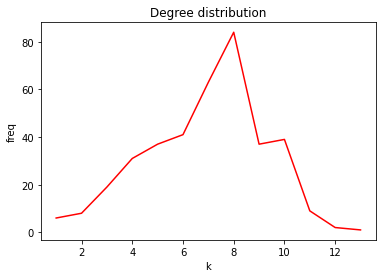

In [14]:
#Degree distribution
vidx_to_deg_res, degs_to_freq = get_degdistrib(gur, isbottom = True)
degs_res = list(degs_to_freq.keys())
count_res = list(degs_to_freq.values())

plt.plot(degs_res,count_res,'r-')
plt.title('Degree distribution')
plt.ylabel('freq')
plt.xlabel('k')
plt.show()

### User degree distribution

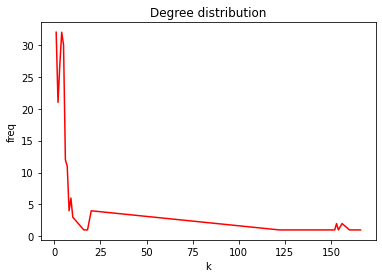

In [15]:
vidx_to_deg_usr, degs_to_count = get_degdistrib(gur, isbottom = False)
degs_usr = list(degs_to_count.keys())
count_usr = list(degs_to_count.values())

plt.plot(degs_usr,count_usr,'r-')
plt.title('Degree distribution')
plt.ylabel('freq')
plt.xlabel('k')
plt.show()